# Reproducibale Challenge Project
### Alexander Svensson & Love Sundin
2025-10-21

__(1)__ A well-defined problem


How benign the canser is.

__(2)__ Use data from an existing source, or generate data as part of a simulation experiment

[Länk Data](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Read input data and convert
column_names = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]
class_dict = {2: "benign", 4: "malign"}
input_df = pd.read_csv("Data files/breast-cancer-wisconsin.data", header=None, names=column_names, na_values=["?"])
input_df["Class"] = input_df["Class"].replace(class_dict)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malign
697,897471,4,8,6,4,3,4.0,10,6,1,malign


In [5]:
input_df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
print(input_df.isna().sum())
print(f'Shape original: {input_df.shape}')
input_df = input_df.dropna()
print(f'Shape after drop: {input_df.shape}')

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
Shape original: (699, 11)
Shape after drop: (683, 11)


In [ ]:
# Split into training and test data
training_df, test_df = sklearn.model_selection.train_test_split(input_df, train_size=0.8, test_size=0.2, random_state=688712398)

Text(0.5, 1.0, 'Violin plots')

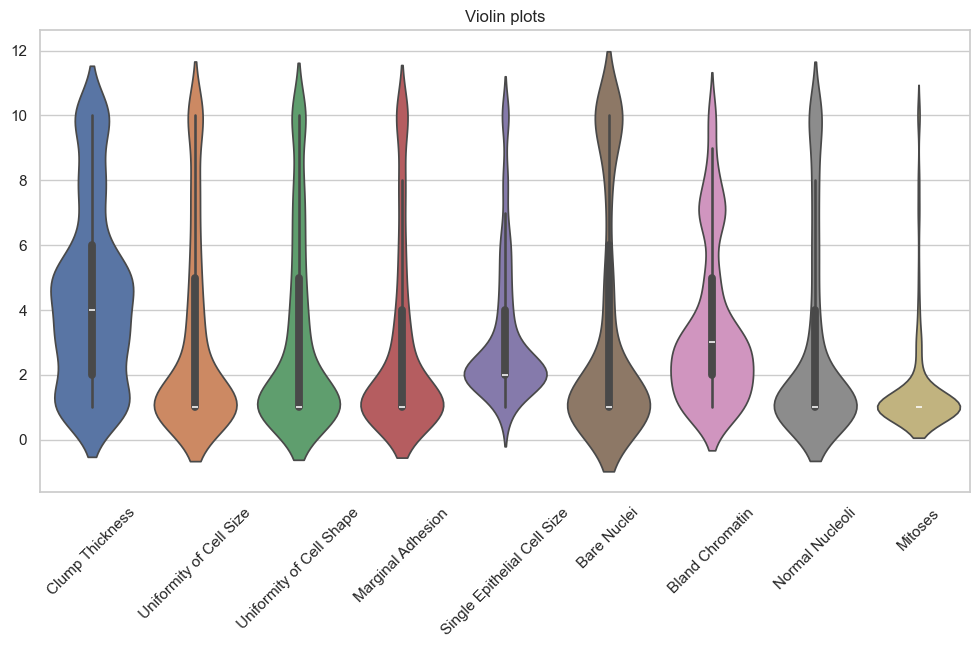

In [7]:
independent_variables = [
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses"
]

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.violinplot(data=input_df[independent_variables], inner='box')
plt.xticks(rotation=45)
plt.title("Violin plots")

In [ ]:
# Plot histograms for all independent variables

possible_classes = class_dict.values()

class_colors = ["mediumseagreen", "orangered"]

figure, axes = plt.subplots(9, 2)
figure.set_size_inches(10, 14)
figure.tight_layout()
bins = range(1, 11)
for class_index, tumor_class in enumerate(possible_classes):
    axis = axes[0, class_index]
    axis.set_title(tumor_class)
for variable_index, variable in enumerate(independent_variables):
    for class_index, tumor_class in enumerate(possible_classes):
        color = class_colors[class_index]
        axis = axes[variable_index][class_index]
        datapoints = input_df.query(f"Class == \"{tumor_class}\"")[variable]
        axis.hist(datapoints, color=color, bins=bins)
        axis.set_xlabel(variable)
        axis.xaxis.set_label_position('top') 

__(3)__ Include data analysis with one or more methods of statistical learning from the course

* Unsupervised Learning – Clustering
* Supervised Learning – Classification
* __Neural Network Implementation__
* __Predictive modelling__

__(4)__ Justify the choice and discussion of limitations of the method

__(5)__ Data visualisation and a discussion of why particular graph styles were chosen.

__(6)__ Reflection on FAIR principles, and how each concept of the acronym relates to the project (data and workflow).

* __F__ - 
* __A__ - 
* __I__ - 
* __R__ - 

__(7)__ All of the above should be implemented in a reproducible workflow, e.g. a Jupyter Notebook. Please upload it to complete the final assignment.

__(8)__ Finally, all groups present their project for the class, maximum 10 minutes per group (please rehearse beforehand to ensure that you keep this limit, as the schedule is tight).

# Report

### Introduction and Objective

### Methodology for each task

### Results with supporting visuals

### Interpretation of Findings

### Conclusion summarizing key insights